# Coding Block 1 - Classification Report, AUROC, AUPRC

### Load the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score, average_precision_score
import matplotlib.pyplot as plt

### Read the dataset 

In [2]:
df = pd.read_csv("../data/diabetes.csv")

### Rerun one of your last successful predictive models

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor

# 📌 Lade den Diabetes-Datensatz
file_path = "../data/df_imputed_clean.csv"  # Pfad anpassen
df = pd.read_csv(file_path)

# 📌 Definiere die Zielvariable
label = "Outcome"  # Annahme: Die Spalte "Outcome" enthält die Zielvariable (Diabetes Ja/Nein)

# 📌 Splitte die Daten in Trainings- und Testset (80% Training, 20% Test)
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42, stratify=df[label])


# 📌 Trainiere AutoGluon-Predictor mit Hyperparameter-Tuning
predictor = TabularPredictor(label=label, path="autogluon_models").fit(
    train_data,
    presets="medium_quality",  # Schnellere Optimierung mit begrenztem Hyperparameter-Tuning
    time_limit=600,  # Maximale Trainingszeit in Sekunden (z. B. 10 Minuten)
    verbosity=2  # Zeigt detaillierte Logs zum Training
)

# 📌 Zeige das Leaderboard mit den besten Modellen
leaderboard = predictor.leaderboard(test_data, silent=True)
print(leaderboard)

# 📌 Mache Vorhersagen auf den Testdaten
y_pred = predictor.predict(test_data.drop(columns=[label]))  # Entferne die Zielvariable für Vorhersagen
print("📌 Beispielhafte Vorhersagen:\n", y_pred.head())

# 📌 Berechne Modellgenauigkeit
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_data[label], y_pred)
print(f"📌 Modellgenauigkeit auf Testdaten: {accuracy:.4f}")


/Applications/anaconda3/envs/aa_tuesday/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.9.21
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:24:22 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T6041
CPU Count:          12
Memory Avail:       10.42 GB / 24.00 GB (43.4%)
Disk Space Avail:   267.00 GB / 460.43 GB (58.0%)
Presets specified: ['medium_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "/Users/davidsuss/Documents/GitHub/Applied-Analytics/05_Friday/autogluon_models"
Train Data Rows:    583
Train Data Columns: 12
Label Column:       Outcome
AutoGluon infers your

                  model  score_test  score_val eval_metric  pred_time_test  \
0        ExtraTreesGini    0.801370   0.726496    accuracy        0.028612   
1         LightGBMLarge    0.794521   0.811966    accuracy        0.002585   
2   WeightedEnsemble_L2    0.794521   0.811966    accuracy        0.003203   
3      RandomForestGini    0.794521   0.760684    accuracy        0.015960   
4      RandomForestEntr    0.794521   0.760684    accuracy        0.016102   
5        ExtraTreesEntr    0.794521   0.717949    accuracy        0.017304   
6              CatBoost    0.767123   0.769231    accuracy        0.001235   
7            LightGBMXT    0.767123   0.786325    accuracy        0.001558   
8               XGBoost    0.767123   0.803419    accuracy        0.003780   
9              LightGBM    0.732877   0.794872    accuracy        0.000952   
10       KNeighborsUnif    0.636986   0.717949    accuracy        0.015053   
11       KNeighborsDist    0.630137   0.735043    accuracy      

In [6]:
best_model_name = leaderboard.iloc[0]["model"]  # Das beste Modell aus der Tabelle nehmen
print("Bestes Modell:", best_model_name)

# Zeige die Details zum besten Modell
model_info = predictor.model_best  # Gibt das beste Modell zurück
print("Beste Modell-Details:", model_info)


Bestes Modell: ExtraTreesGini
Beste Modell-Details: WeightedEnsemble_L2


In [ ]:
predictor.info()["model_info"][best_model_name]["hyperparameters"]

{'n_estimators': 300,
 'max_leaf_nodes': 15000,
 'n_jobs': -1,
 'random_state': 0,
 'bootstrap': True,
 'criterion': 'gini'}

✅ Modellgenauigkeit auf Testdaten: 0.7877

📌 Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.85      0.84        97
         1.0       0.69      0.67      0.68        49

    accuracy                           0.79       146
   macro avg       0.76      0.76      0.76       146
weighted avg       0.79      0.79      0.79       146



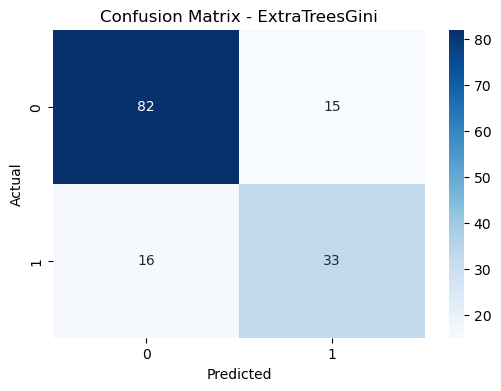

/var/folders/5w/h4z5hq9j70s0kq9njbq1fktc0000gn/T/ipykernel_51502/3516139639.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")


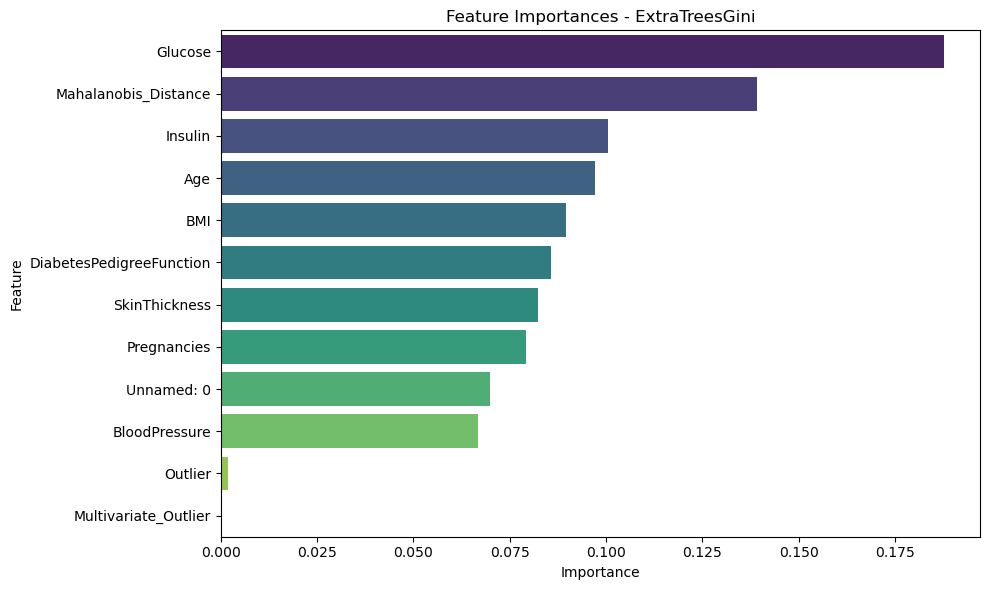

In [9]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Lade die Daten
file_path = "../data/df_imputed_clean.csv"  # Falls noch nicht geladen
df = pd.read_csv(file_path)

# 📌 Features und Zielvariable definieren
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# 📌 Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 ExtraTreesClassifier mit den AutoGluon-Hyperparametern
model = ExtraTreesClassifier(
    n_estimators=300,       # Anzahl der Bäume
    max_leaf_nodes=15000,   # Maximale Anzahl an Blattknoten
    n_jobs=-1,              # Nutzung aller verfügbaren Kerne
    random_state=0,         # Zufallsseed für Reproduzierbarkeit
    bootstrap=True,         # Bootstrapping aktiviert
    criterion="gini"        # Gini-Index als Spaltungsmaß
)

# 📌 Modell trainieren
model.fit(X_train, y_train)

# 📌 Vorhersagen treffen
y_pred = model.predict(X_test)

# 📌 Modellbewertung
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Modellgenauigkeit auf Testdaten: {accuracy:.4f}")
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

# 📌 Confusion Matrix visualisieren
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - ExtraTreesGini")
plt.show()

# 📌 Feature Importance visualisieren
importances = model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({"Feature": features, "Importance": importances}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Feature Importances - ExtraTreesGini")
plt.tight_layout()
plt.show()


In [10]:
y_pred = predictor.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"AutoGluon Ensemble Genauigkeit: {accuracy:.4f}")


AutoGluon Ensemble Genauigkeit: 0.7945


### Produce the classification report for the model
function "classification_report" from scikit-learn package

In [12]:
from sklearn.metrics import classification_report

# 📌 Modell-Informationen
model_name = "ExtraTreesGini"
source = "Scikit-Learn (Rekonstruktion aus AutoGluon)"

# 📌 Erzeuge den Klassifikationsbericht
report = classification_report(y_test, y_pred)

# 📌 Zeige den Bericht an, inklusive Modellname und Quelle
print(f"📌 Classification Report for {model_name} (Source: {source}):\n")
print(report)


📌 Classification Report for ExtraTreesGini (Source: Scikit-Learn (Rekonstruktion aus AutoGluon)):

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        97
         1.0       0.69      0.69      0.69        49

    accuracy                           0.79       146
   macro avg       0.77      0.77      0.77       146
weighted avg       0.79      0.79      0.79       146



### Plot a ROC curve and a Precision-Recall-Curve for the model

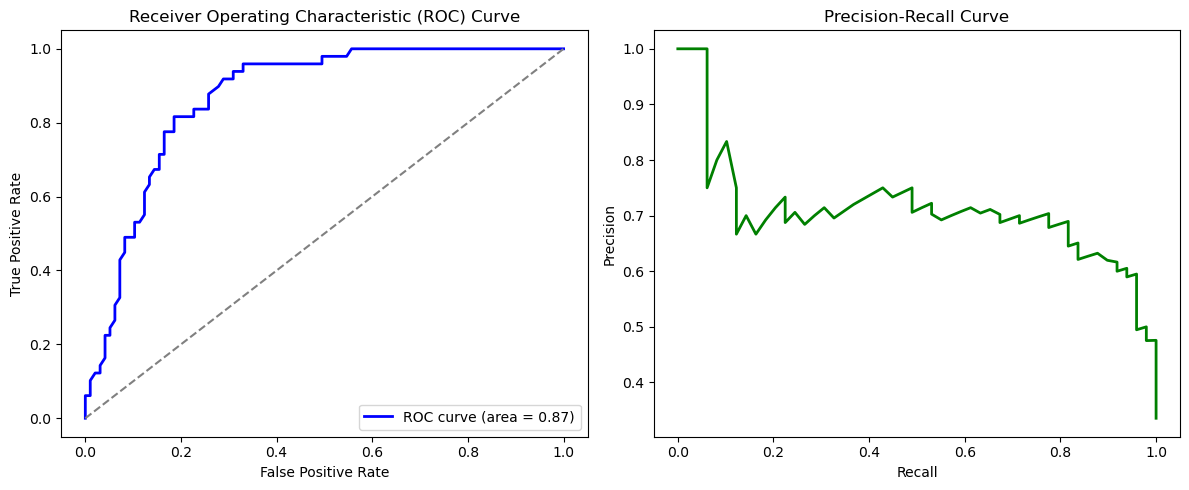

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 📌 Wahrscheinlichkeiten für die positive Klasse (1) erhalten
y_probs = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeit für Klasse "1"

# 📌 ROC-Kurve berechnen
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 📌 Precision-Recall-Kurve berechnen
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# 📌 ROC-Kurve plotten
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")

# 📌 Precision-Recall-Kurve plotten
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color="green", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")

plt.tight_layout()
plt.show()


### Determine the AUROC and AUPRC metrics

In [14]:
from sklearn.metrics import roc_auc_score, average_precision_score

# 📌 Wahrscheinlichkeiten für die positive Klasse (1) erhalten
y_probs = model.predict_proba(X_test)[:, 1]  # Wahrscheinlichkeit für Klasse "1"

# 📌 AUROC berechnen
auroc = roc_auc_score(y_test, y_probs)

# 📌 AUPRC berechnen
auprc = average_precision_score(y_test, y_probs)

# 📌 Ergebnisse ausgeben
print(f"✅ Area Under ROC Curve (AUROC): {auroc:.4f}")
print(f"✅ Area Under Precision-Recall Curve (AUPRC): {auprc:.4f}")


✅ Area Under ROC Curve (AUROC): 0.8698
✅ Area Under Precision-Recall Curve (AUPRC): 0.7117


🔹 AUROC (Area Under the Receiver Operating Characteristic Curve)
Wert: 0.8698

Interpretation: Dein Modell unterscheidet mit ≈ 87% Genauigkeit zwischen den positiven (Diabetes vorhanden) und negativen Klassen (kein Diabetes).
Bedeutung:
1.0 → Perfektes Modell (keine False Positives oder False Negatives)
0.5 → Zufälliges Raten (Modell ist nicht besser als Münzwurf)
< 0.5 → Schlechtes Modell (schlechter als Zufall, evtl. invertierte Vorhersagen)
Ergebnis: Dein Modell hat eine sehr gute Trennschärfe. Ein Wert über 0.85 wird oft als starkes Modell angesehen.


🔹 AUPRC (Area Under Precision-Recall Curve)
Wert: 0.7117

Interpretation: Die durchschnittliche Precision (Präzision) für alle Recall-Werte beträgt 71%.
Bedeutung:
Besonders wichtig bei unausgeglichenen (imbalanced) Klassen, weil PR-Kurven zeigen, wie gut das Modell echte Positive findet, ohne zu viele False Positives zu haben.
Höherer Wert bedeutet bessere Balance zwischen Präzision & Recall.
Ergebnis: Ein Wert von 0.71 ist solide, aber es gibt möglicherweise Verbesserungspotenzial, z. B. durch Threshold-Tuning oder Feature-Engineering.